In [1]:
# 加载鸢尾花数据集
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
mydata = datasets.load_iris()

In [2]:
mydata.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
# 方便数据可视化, 仅选取数据的前两个特征
X = mydata.data[:,:2]
X.shape

(150, 2)

In [4]:
y = mydata.target
y.shape

(150,)

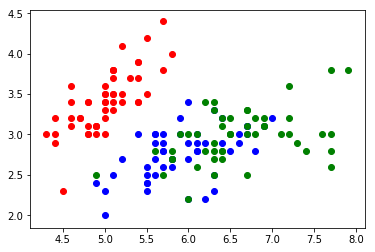

In [5]:
plt.scatter(X[y==0,0], X[y==0,1], color = 'red')
plt.scatter(X[y==1,0], X[y==1,1], color = 'blue')
plt.scatter(X[y==2,0], X[y==2,1], color = 'green')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

# 1. 调节logisticRegression 中的参数实现多分类问题

默认的logisticegression中使用的是ovr来解决多分类问题

In [7]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression()
logisticReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

参数：   
multi_class='ovr'(default) Multiclass option can be either ‘ovr’ or ‘multinomial’.    
     if multi_class = 'ovr',solver = 'liblinear'（‘liblinear’ is limited to one-versus-rest schemes）    
     if multi_class = 'multinomial'(即我们所说的ovo), 在本实验中,令solver = 'newton-cg'

In [8]:
logisticReg.score(X_test, y_test)


0.6578947368421053

可视化分类效果,绘制决策边界

In [9]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[3], axis[2], int((axis[3]-axis[2])*100))
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(x_new)
    ss = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, ss, linewidth=5, cmap=custom_cmap)

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


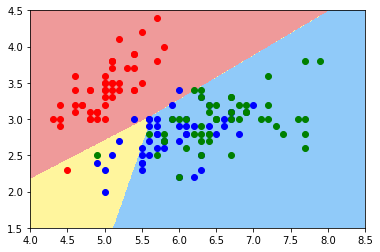

In [10]:
plot_decision_boundary(logisticReg, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1], color = 'red')
plt.scatter(X[y==1,0], X[y==1,1], color = 'blue')
plt.scatter(X[y==2,0], X[y==2,1], color = 'green')
plt.show()

从图中也可以看出,得到的分类效果不是很好。

下面,用ovo来使二分类问题变成多分类问题

In [11]:
logisticReg1 = LogisticRegression(multi_class='multinomial', solver = 'newton-cg')
logisticReg1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
logisticReg1.score(X_test, y_test)

0.7894736842105263

解决多分类问题时，在逻辑回归中加入OVO比加入OVR分类的准确率高了一些

下面可视化logistic1模型的分类效果


/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


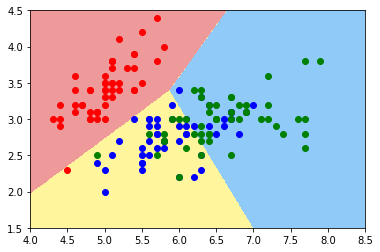

In [13]:
plot_decision_boundary(logisticReg1, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1], color = 'red')
plt.scatter(X[y==1,0], X[y==1,1], color = 'blue')
plt.scatter(X[y==2,0], X[y==2,1], color = 'green')
plt.show()

# 2.使用数据的全部特征,通过调节logisticegression中的参数实现多分类

OVR

In [14]:
X_all = mydata.data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_all, y, random_state=666)
logisticReg3 = LogisticRegression()
logisticReg3.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
logisticReg3.score(X_test1, y_test1)

0.9473684210526315

用全部的特征,分类的准确率高了很多,看来数据也是很重要的呢

OVO

In [17]:
logisticReg4 = LogisticRegression(multi_class='multinomial', solver = 'newton-cg')
logisticReg4.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
logisticReg4.score(X_test1, y_test1)

1.0

OVO的准确率总是比OVR的准确率更胜一筹,然而运算量也更大

# 3.使用单独的OVR,OVO来解决二分类问题（不仅局限于逻辑回归）到多分类
# 调用sklearn.multiclass.OneVsRestClassifier    
#        sklearn.multiclass.OneVsOneClassifier

OVR

In [20]:
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(logisticReg)
ovr.fit(X_train1, y_train1)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [21]:
ovr.score(X_test1, y_test1)

0.9473684210526315

与2中OVR的多分类准确率相同,可见,logisticRegression中嵌套的ovr实现原理 与OneVsRestClassifier的实现原理相同

OVO

In [23]:
from sklearn.multiclass import OneVsOneClassifier
ovo = OneVsOneClassifier(logisticReg)
ovo.fit(X_train1, y_train1)

OneVsOneClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [25]:
ovo.score(X_test1,y_test1)

1.0

与2中，logisticRegression中使用ovo （multi_class='multinomial', solver = 'newton-cg'）的效果相同